In [1]:
! pip install git+https://github.com/variantperception/vp-analysis-api.git

  Cloning https://github.com/variantperception/vp-analysis-api.git to /private/var/folders/dd/2sk2zf7j1wv0jkhkwl_3450h0000gn/T/pip-req-build-slf21tdw
  Running command git clone --filter=blob:none --quiet https://github.com/variantperception/vp-analysis-api.git /private/var/folders/dd/2sk2zf7j1wv0jkhkwl_3450h0000gn/T/pip-req-build-slf21tdw
  Resolved https://github.com/variantperception/vp-analysis-api.git to commit 89a5190409a4d8705ceefaeff4780cec3a641b9b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import os
from vp_analysis_api.VPAnalysisAPI import VPAnalysisAPI

# download api key file from https://portal.variantperception.com/user/settings?tab=api%20keys
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment
API Key: eyJhb...


In [3]:
# Get tactical Fast Money data for S&P 500 and ACWI
data = api.get_series(["spx_vp_fast_money", "acwi_vp_fast_money"], start_date='2010-01-01', end_date='2012-01-01')

# optional step to enforce frequency and forward-fill holes in data
data = api.clean_df(data, freq='D', start_date=None)
data

,acwi_vp_fast_money,spx_vp_fast_money
dt,,
2010-01-01,55.760207,56.999054
2010-01-02,55.760207,56.999054
2010-01-03,55.760207,56.999054
2010-01-04,56.849700,58.284942
2010-01-05,56.968798,58.274060
...,...,...
2011-12-28,45.780999,49.024400
2011-12-29,46.353837,49.889758
2011-12-30,46.568131,49.769564


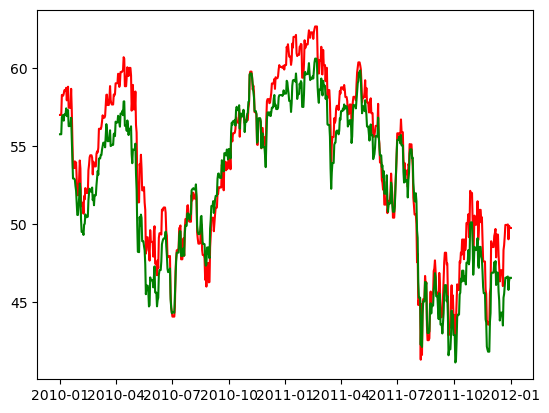

In [4]:
# Plot data
import matplotlib.pyplot as plt
plt.plot(data['spx_vp_fast_money'], color='red')
plt.plot(data['acwi_vp_fast_money'], color='green')

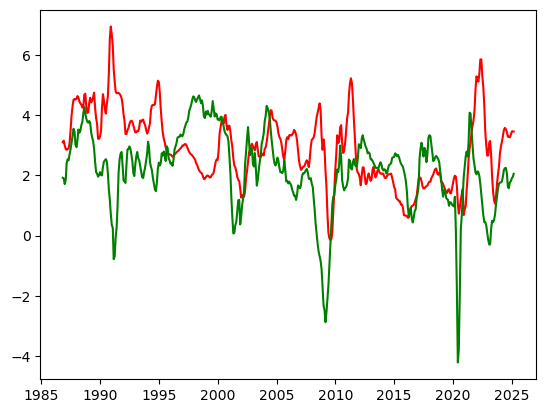

In [5]:
# Get US leading indicators
data = api.get_series(["lei_us_grow", "lei_us_infl"])
data = api.clean_df(data, freq='M', start_date=None)
import matplotlib.pyplot as plt
plt.plot(data['lei_us_infl'], color='red')
plt.plot(data['lei_us_grow'], color='green')


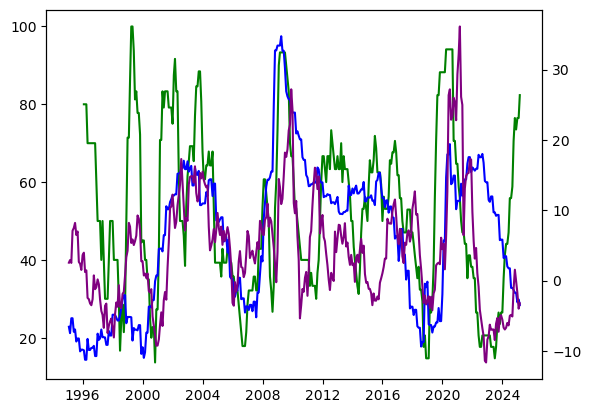

In [6]:
# Get cyclical models: BCFI, Global Excess Liquidity, and Mehrling Multiplier
data = api.get_series(["bcfi24", "globexliq24", "mehrlingmult"])
data = api.clean_df(data, freq='M', start_date='1995-01-01')
import matplotlib.pyplot as plt
plt.plot(data['bcfi24'], color='green')
plt.plot(data['mehrlingmult'], color='blue')
plt.twinx().plot(data['globexliq24'], color='purple')
